#### Photo

In [18]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

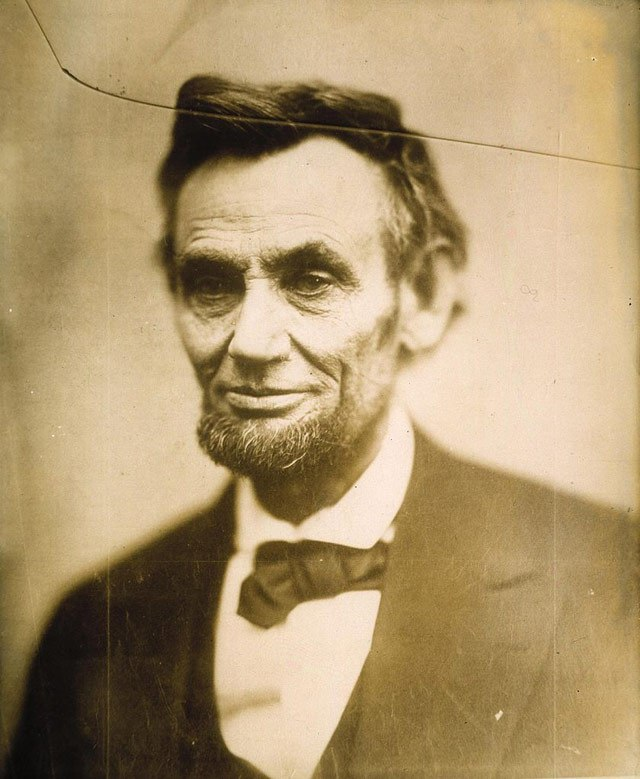

-1

In [19]:
image = cv2.imread("abraham.jpg")
cv2_imshow(image)
cv2.waitKey(0)

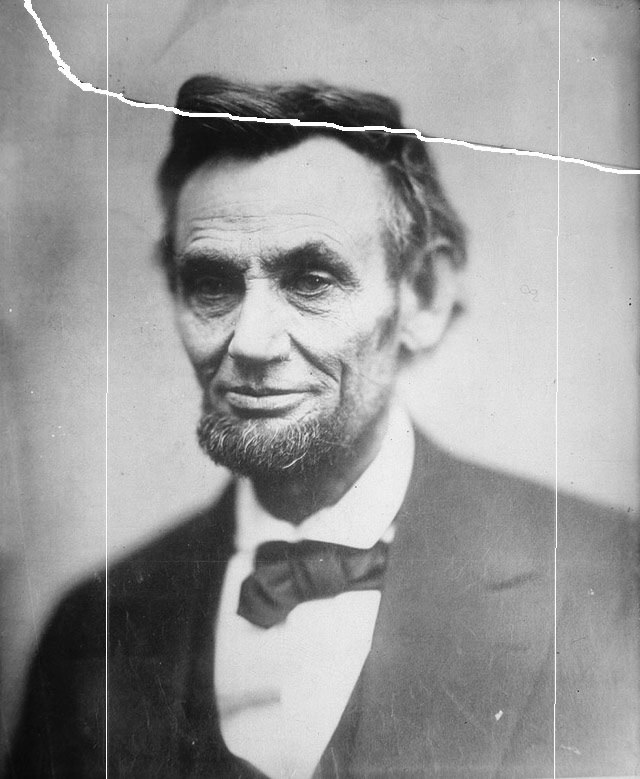

-1

In [20]:
marked_damages = cv2.imread("mask.jpg", 0)
cv2_imshow(marked_damages)
cv2.waitKey(0)

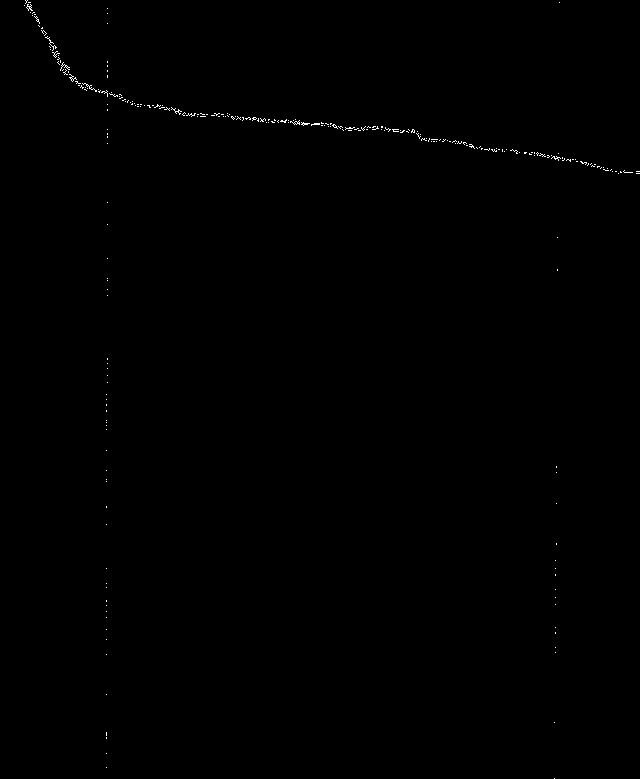

-1

In [23]:
ret, tresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
cv2_imshow(tresh1)
cv2.waitKey(0)

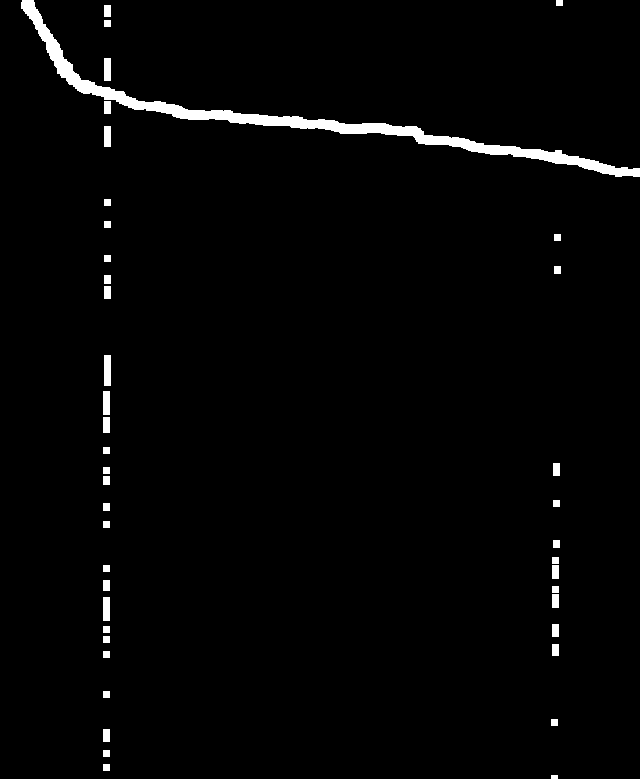

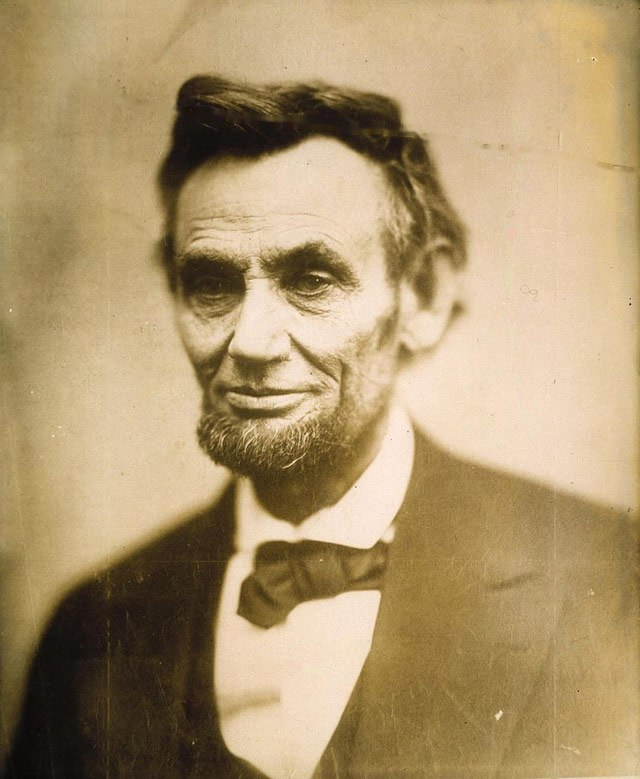

In [25]:
# Let's dilate (make)
kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(tresh1, kernel, iterations = 1)
cv2_imshow(mask) # Dilated Mask
cv2.imwrite("abraham_mask.png", mask)
cv2.waitKey(0)

restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
cv2_imshow(restored)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Inpainting** is the process of reconstructing lost or deteriorated parts of images and videos. It is an advanced form of interpolation that can be used to replace lost or corrupted parts of the image data. \

**cv2.inpaint**(input image, mask, inpaintRadius, Inpaint Method) \

**inpaintRadius** - Radius of a circlar neighborhood of each point inpainted that is considered by the algorithm. Smaller calues look less blurred, while larger values look more pixelated or blurred.

**Inpaint Methods**
- INPAINT_NS - Navier- Stokes based method [Navier01]
- INPAINT_TELEA - Method bu Alexandru Telea [Telea04] - Better as it integrates more seamslessley into the image.